# Part I - Ford GoBike Data Exploration and Visualization
## by James Idowu

## Introduction
Ford GoBike (Currently named Bay Wheels) is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019

This data set includes information about individual rides made in the bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
!pip install geopy --quiet

In [2]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import seaborn as sns
import requests 
import os

%matplotlib inline

In [3]:
pd.options.mode.chained_assignment = None

### Gathering The Dataset

In [4]:
# Creating folder for our dataset on local system if it doesn't exist

folder_name = 'datasets'

if not os.path.exists(folder_name):
  os.makedirs(folder_name)

In [5]:
# Downloading dataset files from url into our local machine

url_data = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'

r_data = requests.get(url_data)

with open ('datasets/201902-fordgobike-tripdata.csv', 'wb') as file:
  file.write(r_data.content)

In [6]:
# Loading the dataset into pandas dataframe

df = pd.read_csv('datasets/201902-fordgobike-tripdata.csv')



### Accessing The Dataset

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [8]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Structure of the dataset

> This dataset consist of **183412** entries with **16** columns

> There are a few missing values in a couple of the observations and some of the columns are not in optimised datatypes for analysis.

## Data Cleaning and Preparation

<ul>
  <li> change datatype of start_time, end_time to datetime datatype</li> 
  <li> change datatype of user_type to category datatype</li>
  <li> fix in the missing values</li>
  <li> Segment the start time of day and end time of day extracted into morning, afternoon and evening in new columns</li>
  <li> Create column with age of bike renter at time of data collection</li>
  <li> Create column with bike rent duration in hours</li>
  <li> Calculate distance between start station and end station into a new column</li>
</ul>

In [11]:
# Creating a copy of the dataframe for cleaning

df_clean = df.copy()

### Changing datatype of start_time and end_time columns to datetime

In [12]:
# Change datatype of start_time, end_time to datetime

df_clean[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)

### Changing datatype of user_type column to category datatype

In [13]:
# confirming the unique values in the user column
df_clean['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [14]:
# changing datatype of user_type to category datatype
df_clean['user_type'] = df['user_type'].astype("category")

### Fixing missing values in the dataset


In [15]:
# Getting the count of missing values in each column

missing_values = df_clean.isna().sum().sort_values(ascending=False)
missing_values

member_birth_year          8265
member_gender              8265
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
duration_sec                  0
start_time                    0
end_time                      0
start_station_latitude        0
start_station_longitude       0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
bike_share_for_all_trip       0
dtype: int64

In [16]:
# Getting the proportion of missing values in each column
missing_prop = (missing_values / len(df_clean)) 
missing_prop


member_birth_year          0.045062
member_gender              0.045062
start_station_id           0.001074
start_station_name         0.001074
end_station_id             0.001074
end_station_name           0.001074
duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
bike_share_for_all_trip    0.000000
dtype: float64

### Visualizing the proportion of missing values in the columns

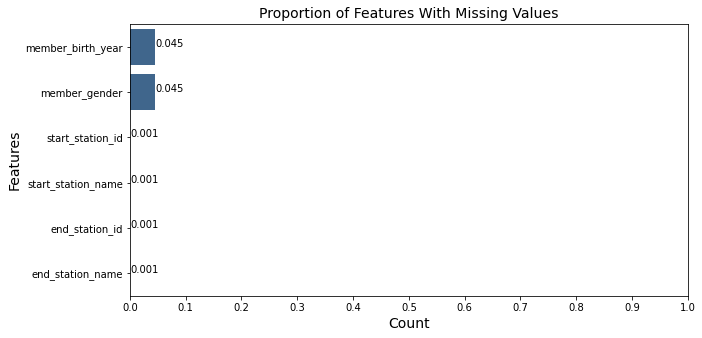

In [17]:
missing_prop = missing_prop.round(3)
missing_prop = missing_prop[missing_prop !=0]

plt.figure(figsize=(10,5))

xs = np.arange(0., 1.10, 0.1)


ax = sns.barplot(y = missing_prop.index, x = missing_prop.values, color=(0.2, 0.4, 0.6, 0.6))
ax.set_xticks(xs)


for index, value in enumerate(missing_prop):
    plt.text(value, index,str(value))
    
plt.title('Proportion of Features With Missing Values', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Count', fontsize=14)

plt.show()

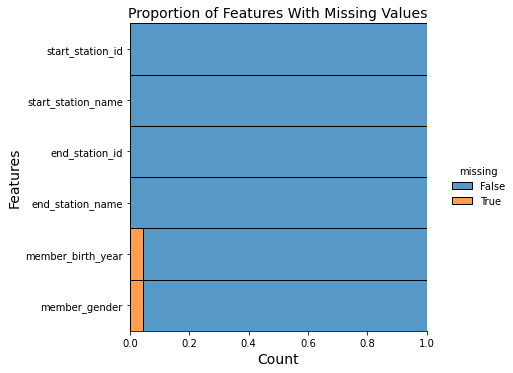

In [18]:
# Plotting out the distribution of missing values in the dataset
sns.displot(
    data=df_clean[df_clean.columns[df_clean.isna().any()]].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
);


plt.title('Proportion of Features With Missing Values', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Count', fontsize=14)

plt.show()

> From the above plots and values we can see that the columns with mising values are not columns that we can fill their missing values with mean or any other statistical averages. Coupled with the fact that the proportion of missing values are relatively low, I believe it's safe to drop them 

### Droping observations with missing values

In [19]:
df_clean = df_clean.dropna()

print(df_clean.isna().sum())

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64


###  Extracting time period of day from start_time and end_time and putting them into  new columns

In [20]:

df_clean['start_time_of_day'] = pd.cut(df_clean.start_time.dt.hour,
       bins=[0, 6, 12, 16, 18,24],
       labels=['midnight', 'morning', 'afternoon', 'evening','night'],
       right=False,
       include_lowest=True)

df_clean['end_time_of_day'] = pd.cut(df_clean.end_time.dt.hour,
       bins=[0, 6, 12, 16, 18,24],
       labels=['midnight', 'morning', 'afternoon', 'evening','night'],
       right=False,
       include_lowest=True)
       

In [21]:
df_clean.sample(8)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_of_day,end_time_of_day
179618,496,2019-02-01 13:14:39.878,2019-02-01 13:22:56.355,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,245.0,Downtown Berkeley BART,37.870139,-122.268422,5153,Subscriber,2000.0,Male,Yes,afternoon,afternoon
42400,495,2019-02-22 17:35:03.001,2019-02-22 17:43:18.120,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,4804,Subscriber,1981.0,Male,No,evening,evening
129586,278,2019-02-10 09:41:52.656,2019-02-10 09:46:30.849,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,75.0,Market St at Franklin St,37.773793,-122.421239,4644,Subscriber,1973.0,Female,No,morning,morning
165944,466,2019-02-04 20:59:00.136,2019-02-04 21:06:47.095,112.0,Harrison St at 17th St,37.763847,-122.413004,144.0,Precita Park,37.747300,-122.411403,563,Subscriber,1987.0,Male,No,night,night
112096,914,2019-02-12 16:02:07.681,2019-02-12 16:17:22.062,350.0,8th St at Brannan St,37.771431,-122.405787,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Subscriber,1960.0,Male,No,evening,evening
73114,449,2019-02-19 14:47:32.375,2019-02-19 14:55:01.416,97.0,14th St at Mission St,37.768265,-122.420110,58.0,Market St at 10th St,37.776619,-122.417385,2790,Subscriber,1981.0,Male,No,afternoon,afternoon
96293,482,2019-02-15 10:51:39.563,2019-02-15 10:59:42.138,310.0,San Fernando St at 4th St,37.335885,-121.885660,296.0,5th St at Virginia St,37.325998,-121.877120,3851,Subscriber,1992.0,Male,Yes,morning,morning
152096,738,2019-02-06 16:23:18.110,2019-02-06 16:35:36.506,63.0,Bryant St at 6th St,37.775910,-122.402575,126.0,Esprit Park,37.761634,-122.390648,5565,Subscriber,1982.0,Female,No,evening,evening


### Creating column with age of bike renter as at the time of data collection

In [22]:
df_clean['age_of_renter'] =((pd.DatetimeIndex(df_clean['start_time']).year) - df_clean['member_birth_year'] ).astype(int)
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_of_day,end_time_of_day,age_of_renter
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,evening,morning,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,afternoon,midnight,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,evening,midnight,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,night,midnight,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,night,midnight,60


### Creating column with bike rent duration in hours

In [23]:
df_clean['rent_hours'] = ((df_clean['end_time'] - df_clean['start_time']) / pd.Timedelta(hours=1)).round(2)

In [24]:
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_of_day,end_time_of_day,age_of_renter,rent_hours
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,evening,morning,35,14.50
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,afternoon,midnight,47,17.18
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,evening,midnight,30,10.14


### Calculating distance between start station and end station into new column

In [25]:
def distance_calc (row):
    start = (row['start_station_latitude'], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])

    return geodesic(start, stop).meters

df_clean['dist_btw_stations(m)'] = df_clean.apply(lambda row: distance_calc (row),axis=1)
df_clean['dist_btw_stations(m)'] = df_clean['dist_btw_stations(m)'].round(2)

In [26]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_of_day,end_time_of_day,age_of_renter,rent_hours,dist_btw_stations(m)
18724,679,2019-02-26 18:00:06.463,2019-02-26 18:11:25.724,181.0,Grand Ave at Webster St,37.811377,-122.265192,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,...,6066,Subscriber,1987.0,Male,No,night,night,32,0.19,1930.91
74015,466,2019-02-19 11:53:13.992,2019-02-19 12:01:00.699,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,5412,Subscriber,1987.0,Male,No,morning,afternoon,32,0.13,1525.77
128252,437,2019-02-10 13:43:53.952,2019-02-10 13:51:11.194,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,13.0,Commercial St at Montgomery St,37.794231,...,3071,Subscriber,1983.0,Male,No,afternoon,afternoon,36,0.12,1245.62
131918,1062,2019-02-09 10:13:44.297,2019-02-09 10:31:26.913,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,126.0,Esprit Park,37.761634,...,4757,Subscriber,1989.0,Female,Yes,morning,morning,30,0.30,3135.67
132570,729,2019-02-09 00:09:23.599,2019-02-09 00:21:33.522,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,58.0,Market St at 10th St,37.776619,...,5018,Subscriber,1998.0,Female,No,midnight,midnight,21,0.20,2716.37


In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Data Exploration

- Now that I have prepared the dataset for exploration, the first thing to do is to get a quick overview of the **clean** dataframe before i begin full exploration.

In [28]:
print(df_clean.shape)
print('--------------------')
df_clean.info()

(174952, 21)
--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  in

In [29]:
# Statistical Overview of relevant colums of the dataframe
df_clean[['duration_sec','member_birth_year','age_of_renter','rent_hours','dist_btw_stations(m)']].describe()

,duration_sec,member_birth_year,age_of_renter,rent_hours,dist_btw_stations(m)
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,34.196865,0.195699,1689.939386
std,1642.204905,10.118731,10.118731,0.456181,1096.526462
min,61.000000,1878.000000,18.000000,0.020000,0.000000
25%,323.000000,1980.000000,27.000000,0.090000,909.710000
50%,510.000000,1987.000000,32.000000,0.140000,1428.160000
75%,789.000000,1992.000000,39.000000,0.220000,2224.680000
max,84548.000000,2001.000000,141.000000,23.490000,69465.980000


### Main feature(s) of interest in the dataset to me:

- I am most interested in figuring out what the the bulk of the users are using the bike service for and also what age group do they fall into 

### Features in the dataset that will help support my investigation into my feature(s) of interest are:

- User Type
- Age of Users
- Gender
- Rent Duration
- Distance between Start station and end station
- Start Period of Day(Morning, Afternoon,Evening,Night, Midnight)
- End Period of Day(Morning, Afternoon,Evening,Night, Midnight)

#### Setting default visualization values

In [30]:
# Setting default visualization values
sns.set_style("darkgrid")
color = sns.color_palette()[0] 
# color = '#1f77b4'
params = {'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'legend.fontsize':14,
          'legend.title_fontsize':14}

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams.update(params)


## Univariate Exploration



### Question: 

What is the distribution of User Types in the dataset?

### Visualization

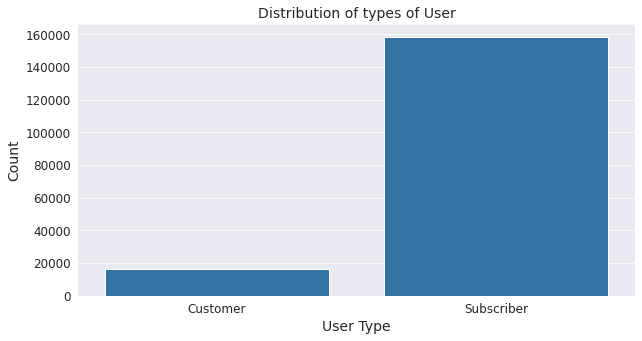

In [31]:
sns.countplot(x= 'user_type', data = df_clean, color=color)

plt.title('Distribution of types of User')
plt.xlabel('User Type')
plt.ylabel('Count')

plt.show()

### Observations

It appears that there are alot more subscribers than one-of customers that use the service. We can go more granular by ploting the proportion of this difference.

### Question

What percentage of users are Subscribers and what percentage are customers

### Visualization

In [32]:
# Getting the percentage distribution of user types in the dataset

user_type_prop = (df_clean['user_type'].value_counts(normalize=True) * 100).round(1)

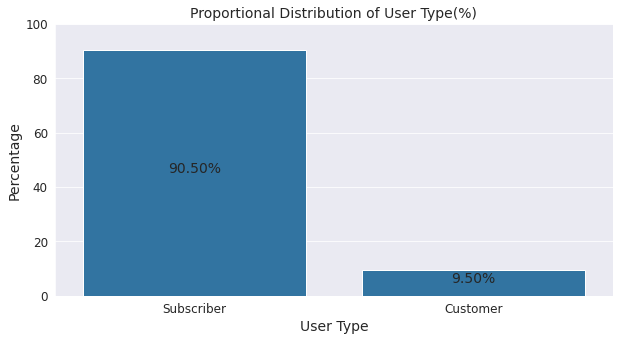

In [33]:
# Barcharting of percentages 

sns.barplot(x=user_type_prop.index, y=user_type_prop.values,color=color, order = user_type_prop.index)


for i in range(user_type_prop.shape[0]):
  str1 = "{:.2f}".format(user_type_prop[i])
  plt.text(i, user_type_prop[i]/2, str1+'%', ha = 'center',fontsize=14)


plt.ylim([0, 100])
plt.ylabel("Percentage")
plt.xlabel("User Type")
plt.title("Proportional Distribution of User Type(%)")

plt.show()


### Observations

From the above chart we can see that about **90%** of users are subscribers

### Question

What is the Age distribution of Users

### Visualization

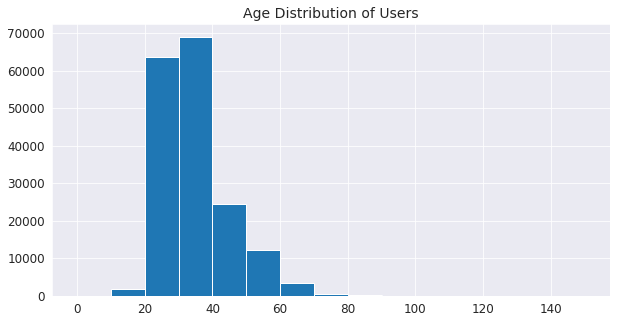

In [34]:
binsize = 10
bins = np.arange(0, df_clean['age_of_renter'].max()+binsize, binsize)

plt.hist(data = df_clean, x = 'age_of_renter', bins = bins)

plt.title("Age Distribution of Users")

plt.show()


### Observations

It appears the majority of users fall within the ages of 20 and 40, with a substantial amount falling between 40 and 60.

The graph is also skewed to the right with a long tail, so we can use a log scale to better peek at the graph.

### Visualization Of Age Distribution on Log Scale

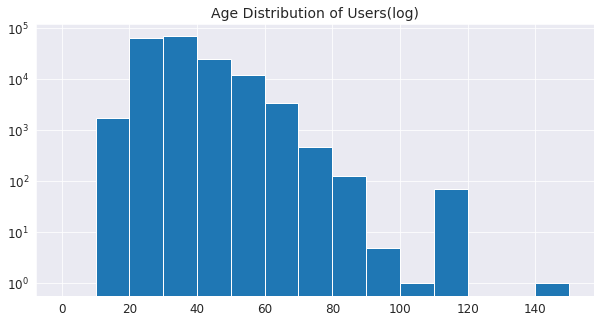

In [35]:
binsize = 10
bins = np.arange(0, df_clean['age_of_renter'].max()+binsize, binsize)

plt.hist(data = df_clean, x = 'age_of_renter', bins = bins, log=True)

plt.title("Age Distribution of Users(log)")

plt.show()

### Observations

When plotted on a log-scale, the age distribution looks right skewed as expected, with a sharp peak between the 110 to 120 age mark, and another uptick at the 140 to 150 mark. This upticks(110 - 140 plus ages) are most likely errors in the dataset and warrant further analysis.

### Question

What is the Gender Distribution of users

### Visualization

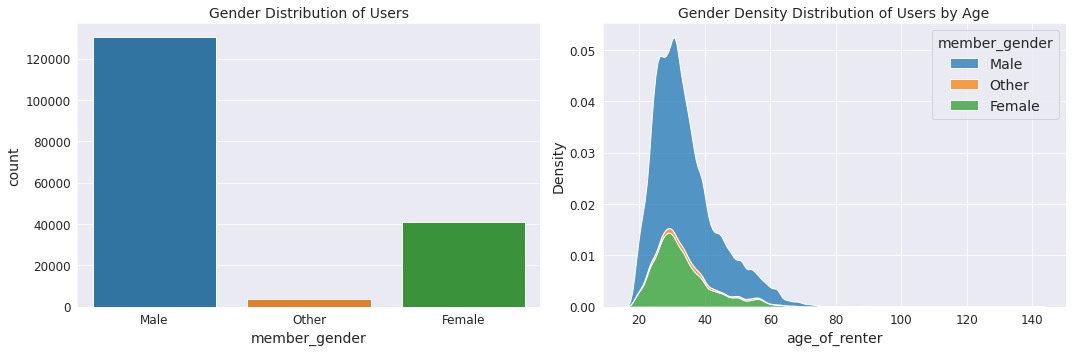

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = df_clean, x = 'member_gender', ax=ax1)
sns.kdeplot(data=df_clean, x="age_of_renter", hue="member_gender", multiple="stack",ax=ax2)

ax1.title.set_text('Gender Distribution of Users')
ax2.title.set_text('Gender Density Distribution of Users by Age')
plt.tight_layout()
plt.show()

### Observation

The above graphs show that the gender distribution is very skewed to the male gender. Most of the users of the service are males both by age and by total number.

### Question

How long do users generally rent the bikes for?

### Visualization

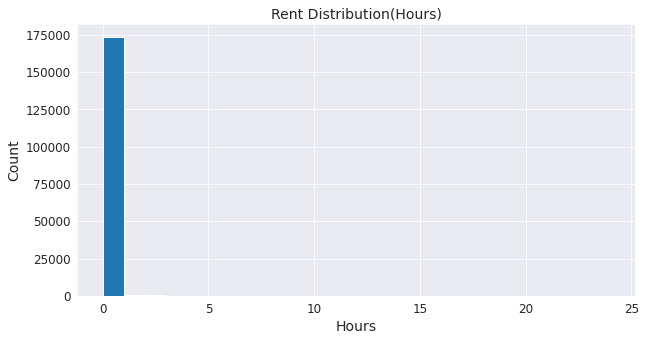

In [37]:
binsize = 1
bins = np.arange(0, df_clean['rent_hours'].max()+binsize, binsize)

plt.hist(data = df_clean, x = 'rent_hours', bins=bins)

plt.title("Rent Distribution(Hours)")
plt.xlabel("Hours")
plt.ylabel("Count")

plt.show()

### Observation

It appears most of the rent duration is within a 1 hour period.

We can drill into the 1 hour period to get a better understanding of how it's distribution is

### Visualizing the rent duration within an hour period

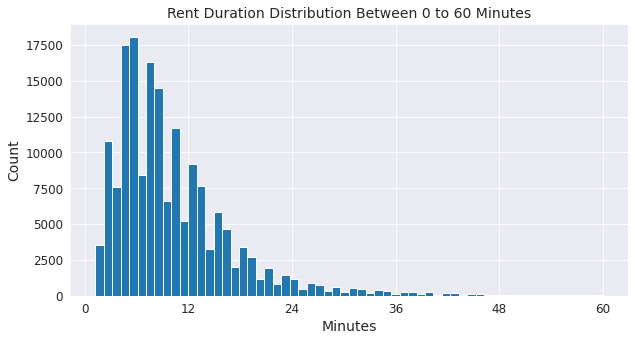

In [38]:
# Importing ticker library for formating matplotlib axes ticks
import matplotlib.ticker as mticker

# Filtering the dataframe to show only observations that have within 1 hour rent duration
less_one_hour = df_clean[df_clean['rent_hours'] <= 1]

fig, ax = plt.subplots()

ax.hist(data=less_one_hour, x='rent_hours',bins=60)

#Formating the xticks to display in Minutes
ax.xaxis.set_major_formatter(mticker.FuncFormatter(
   lambda val,pos: (val*60).astype('int') 
))

plt.title("Rent Duration Distribution Between 0 to 60 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Count")

plt.show()

### Observations

The Above graph shows that quite a lot of the users rent the bikes for roughly 10-12 minutes and from the 15 - 48 minutes mark , we see a steady decline.

This might suggest that most people are renting the bikes for short trips. 

They are also probably not using the same bikes for their to and fro trips. They might be getting one bike for their 'to' trip and returning it, and getting another bike for their return trip.

We can still plot out the entire rent duration on a log scale to see the entire distribution.

### Visualizing the rent duration for the entire dataset on log scale

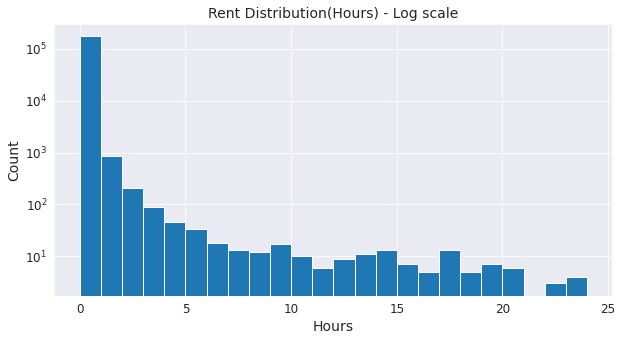

In [39]:
binsize = 1
bins = np.arange(0, df_clean['rent_hours'].max()+binsize, binsize)

plt.hist(data = df_clean, x = 'rent_hours', bins=bins, log=True)



plt.title("Rent Distribution(Hours) - Log scale")
plt.xlabel("Hours")
plt.ylabel("Count")

plt.show()

### Observations

As expected, we can see the scale disparity in scale of within 1 hour and the rest

### Question

What is the Distribution of Distance between Start station and End station

### Visualization

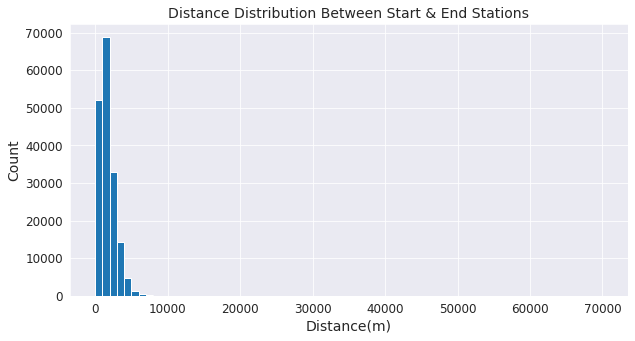

In [40]:
binsize = 1000
bins = np.arange(0, df_clean['dist_btw_stations(m)'].max()+binsize, binsize)

plt.hist(data = df_clean, x = 'dist_btw_stations(m)', bins=bins)

plt.title("Distance Distribution Between Start & End Stations")
plt.xlabel("Distance(m)")
plt.ylabel("Count")

plt.show()

### Observations

As expected the distance between start and end stations are not really that far as the bulk falls within a 5000m - 6000m (5km - 6km) range.

### Question

What is the time period distribution of renting and of returning?

Basically what period of the day do people use the service the most and the least

### Visualization

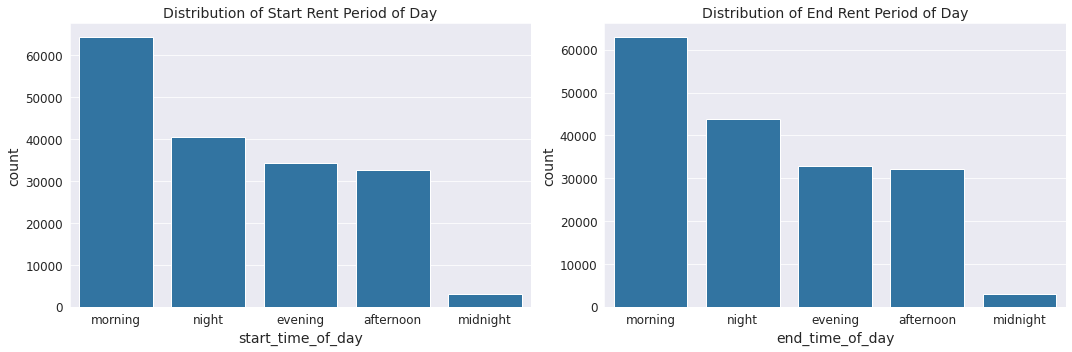

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.countplot(
                data = df_clean,
                x = 'start_time_of_day', 
                ax=ax1,color=color,
                order=df_clean['start_time_of_day'].value_counts().index
              )
sns.countplot(
                data = df_clean, 
                x = 'end_time_of_day', 
                ax=ax2,
                color=color,
                order=df_clean['start_time_of_day'].value_counts().index
              )

ax1.title.set_text('Distribution of Start Rent Period of Day')
ax2.title.set_text('Distribution of End Rent Period of Day')
plt.tight_layout()
plt.show()

### Observations

It appears most people rent the bikes in the morning followed by night time. 
We also see this trend in when people return the bikes most. 

With the age distribution of a majority within the ages of 20-40 yrs and the short distance generally covered, it seems quite a lot of the users use the service to commute to and fro from work.

We can plot this corroletion next to see if the ages correlate with time of day of rent.

## Bivariate Exploration


#### Question

What is the relationship between the user ages and time period rent and return

### Visualization

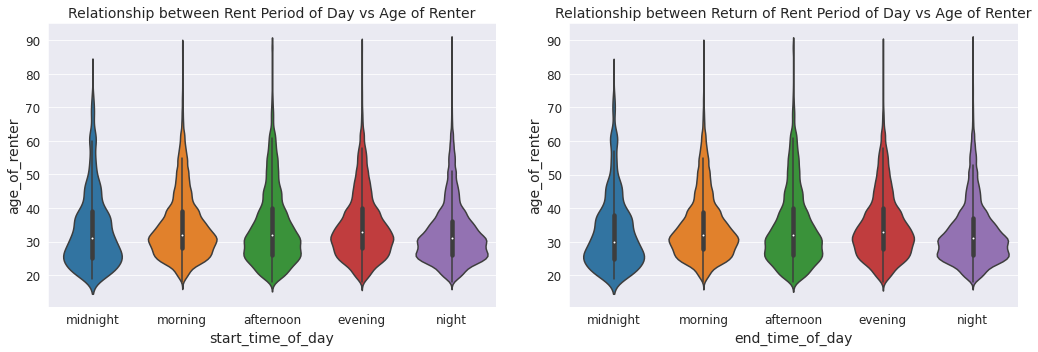

In [42]:
# Filtering out ages that are less than 90 years as most people above 90 years would 
# most likely be errors in our dataset
ages = df_clean[df_clean['age_of_renter'] < 90]


# Ploting the relationship

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

sns.violinplot(x='start_time_of_day', y="age_of_renter",data=ages, ax = ax1)
sns.violinplot(x='end_time_of_day', y="age_of_renter",data=ages, ax = ax2)


ax1.title.set_text('Relationship between Rent Period of Day vs Age of Renter')
ax2.title.set_text('Relationship between Return of Rent Period of Day vs Age of Renter')
plt.tight_layout()
plt.show()

### Observation

As speculated above, most of the renters fall between the ages of 20-40yrs old and the bulk of the 25-30+ years rent and return the bikes in the mornings and at night.

This seems to fit the hypotesis that a good numbers of the users use the service to commute to & fro from work 

### Question 

How is the age distribution of the users spread across the genders

### Visualization

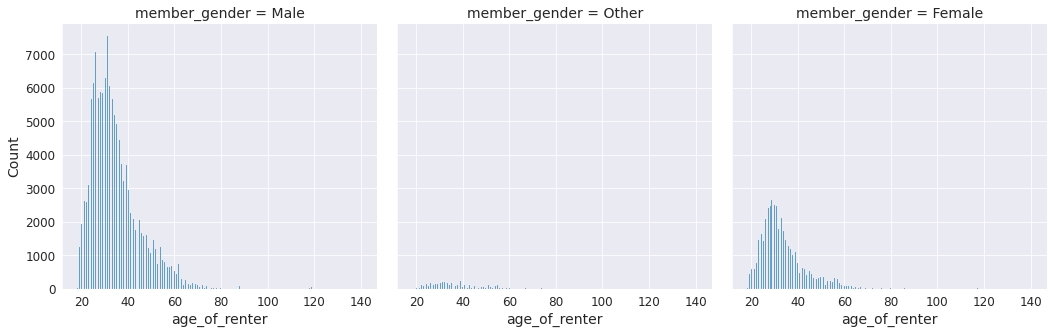

In [43]:
sns.displot(df_clean, x="age_of_renter", col="member_gender")


plt.tight_layout(pad=2)
plt.show()

### Observation

The above shows that the vast amount of users of the service are males

### Question

What are the correlations between the features in the dataset

### Visualization

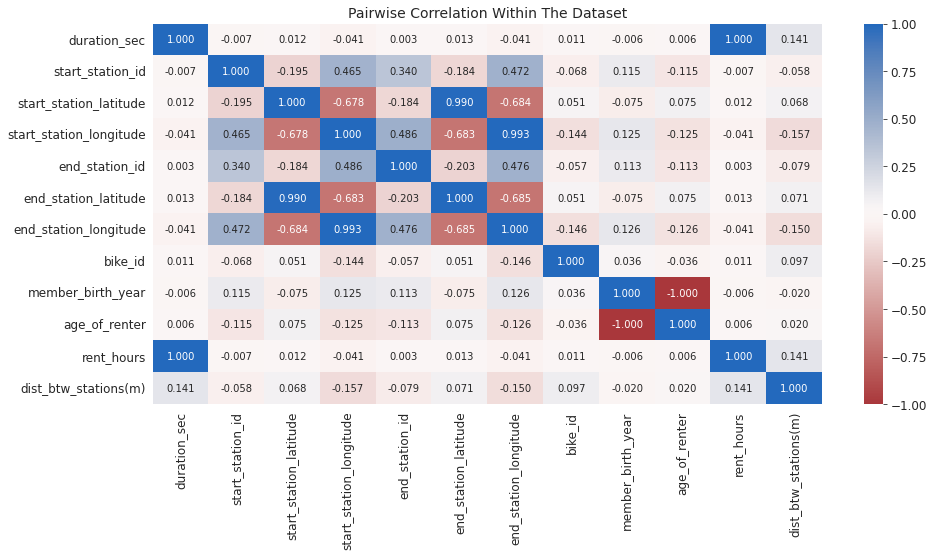

In [44]:
corr = df_clean.corr()

plt.figure(figsize = [15, 7])
sns.heatmap(corr,
            annot = True, 
            fmt = '.3f',
            cmap = 'vlag_r', 
            center = 0
            )
plt.title('Pairwise Correlation Within The Dataset')

plt.show()

### Observations

As shown by  the heatmap, there appears to be no significant high correlations within the dataset.

Although the correlation between of rent duration(Secs & Hours) and distance between stations does seem a bit interesting. We can look at this further using a scatterplot. 

### Question 

What is the correlation between rent duration and distance between start and end stations

### Visualization

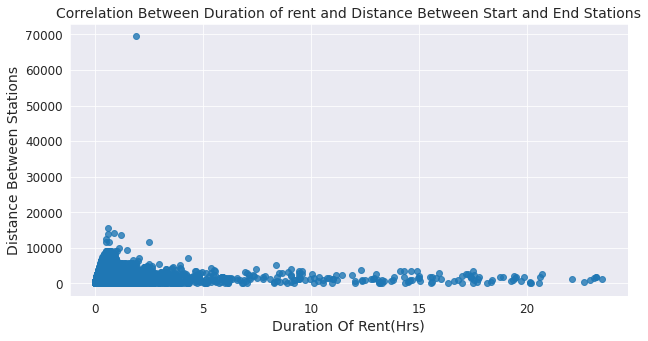

In [45]:
plt.scatter(data = df_clean, y = 'dist_btw_stations(m)', x = 'rent_hours', alpha = 0.8)

plt.title('Correlation Between Duration of rent and Distance Between Start and End Stations')
plt.xlabel('Duration Of Rent(Hrs)')
plt.ylabel('Distance Between Stations')

plt.show()


### Observation

From the scatterplot above, it appears that as the time duration of rent increases after about 1hr, the distance between rent station and return station reduces. This might suggest that those who use the bike sharing service for longer times during the day tend to return it back to stations closer to where they rented it in the first place.

Basically they are not using each bike for a one way trip.

## Multivariate Exploration


### Question

Are there any significant relationships between gender,rent duration and user type in the dataset

### Visualization

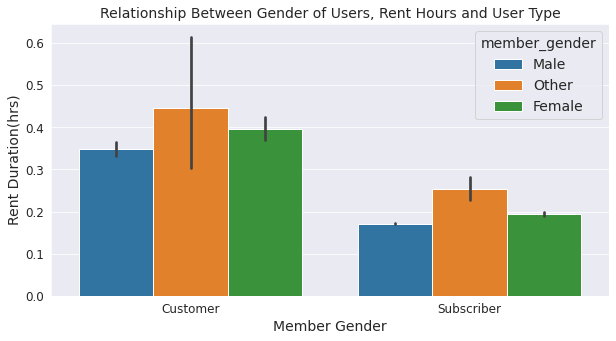

In [46]:
sns.barplot(data = df_clean, x = 'user_type', y = 'rent_hours', hue = 'member_gender')

plt.title('Relationship Between Gender of Users, Rent Hours and User Type')
plt.xlabel('Member Gender')
plt.ylabel('Rent Duration(hrs)')

plt.show()

### Observation

It appears those who are subscribed to the service use it for lesser rent hours as compared to those who pay for it on a per service usage rate. This might suggest that those who are subscribed to the service have a fixed short distance route they need the service for. This follows with our earlier hypotesis that many people might be using the service for their daily commute to and fro from work or business. The above graph also show that on average, male users rent the bikes for a shorter period than other users across the board.

### Question

What are the top 10 most frequented stations and what are the relationships between them and other features

In [47]:
# Getting the top 10 frequented start stations in the dataset
top_rent_stations = df_clean['start_station_name'].value_counts().head(10)
top_rent_stations

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

### Relationship Between the Top 10 Most Frequented Start Stations, User Ages, User Types

### Visualization

In [48]:
# Creating a new dataframe with only the top 10 start stations as a filter
df_top_start_stations = df_clean[df_clean['start_station_name'].isin(top_rent_stations.index)] 

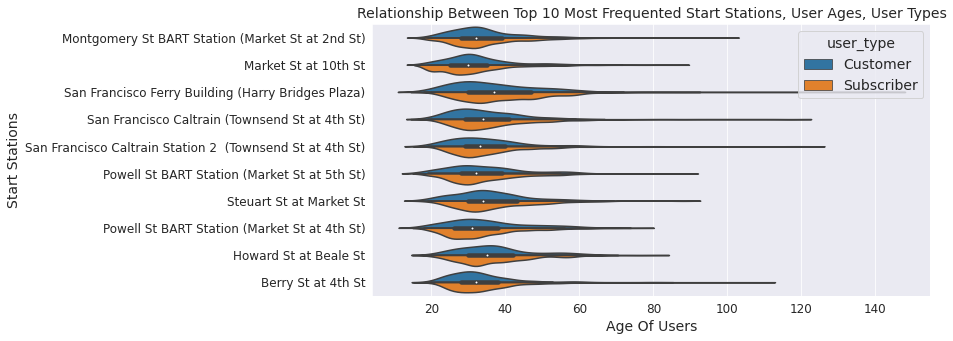

In [49]:
sns.violinplot(y='start_station_name',x="age_of_renter", data=df_top_start_stations, hue='user_type', split='True')

plt.title('Relationship Between Top 10 Most Frequented Start Stations, User Ages, User Types')
plt.xlabel('Age Of Users')
plt.ylabel('Start Stations')

plt.show()

As hypotesized above, amongst the top most used start stations, the ages of users fall within the 20-40 years age mark. This also doesn't change between the types of user. The distribution of age is fairly consistent between the user types.

It's worth nothing that at the San Francisco Ferry Building (Harry Bridges Plaza), there seems to be a significant number of users within the ages of 40-60yrs of age

### Question

What is the relationship between then the top 10 end stations with user ages and user types

### Visualization

In [50]:
# Getting the top 10 frequented start stations in the dataset
top_return_stations = df_clean['end_station_name'].value_counts().head(10)

# Creating a new dataframe with only the top 10 start stations as a filter
df_return_st = df_clean[df_clean['end_station_name'].isin(top_rent_stations.index)] 

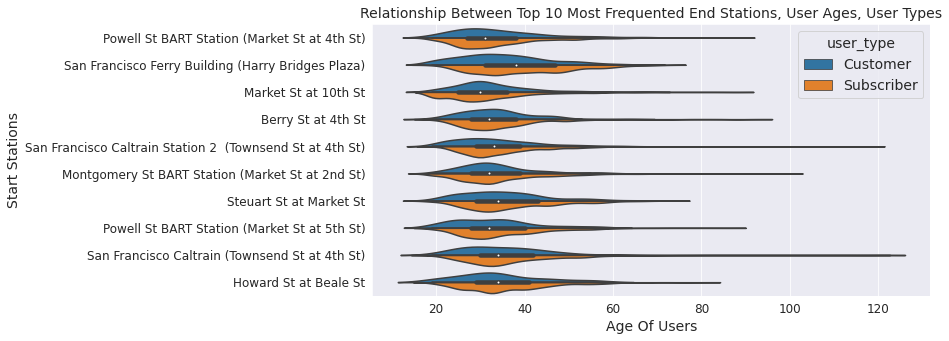

In [51]:
sns.violinplot(y='end_station_name',x="age_of_renter", data=df_return_st, hue='user_type', split='True')

plt.title('Relationship Between Top 10 Most Frequented End Stations, User Ages, User Types')
plt.xlabel('Age Of Users')
plt.ylabel('Start Stations')

plt.show()

### Observations

As our earlier hypotesis suggested, just as the start station relationship, amongst the top most used return stations, the ages of users fall within the 20-40 years age mark. This also doesn't also change between the types of user.

It's also worth nothing that, just like the start station violin plot, San Francisco Ferry Building (Harry Bridges Plaza) also seems to have a significant number of users within the ages of 40-60yrs of age who return their bikes there.

It is likely San Francisco Ferry Building (Harry Bridges Plaza) enviroment has a higher density of people within this age group as opposed to other stations.

### Question

What is the relationship between the top 10 most frequented start stations and distance(btw start & end station) and user types

### Visualization

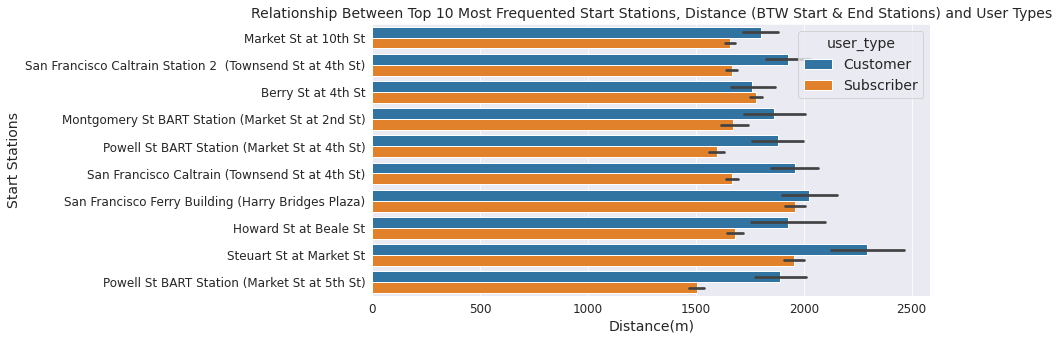

In [52]:
sns.barplot(
              y= 'start_station_name',
              x='dist_btw_stations(m)',
              data = df_top_start_stations,
              hue='user_type', 
              order=df_top_start_stations['start_station_name'].value_counts().index
            )
            

plt.title('Relationship Between Top 10 Most Frequented Start Stations, Distance (BTW Start & End Stations) and User Types')
plt.xlabel('Distance(m)')
plt.ylabel('Start Stations')

plt.show()

### Observations

As hypotesized, the average distance between the 10 most frequented start stations and the return station is around the 2000 meters mark. This distance falls within a few minutes(less than 30mins) bike ride for the average rider. It's also clear from the plot above that within this stations, customer user_types take the bikes for longer distances for return in every instance.

## Conclusions

During this exploratory analysis, it seems the bike sharing service was well recieved by user because about 90% of it's customer base chose to use the service on a subscription basis as opposed to paying on a per use basis. 
This suggest that many people use the service on a regular basis that it made more sense to subscribe to the service that to pay on a per use basis.

It was also observed that a majority of users fell within the 20-40 years of age, with a close second being the age groups of 40 - 60 years of age. Coupled with the fact that alot of people use the service in the mornings followed by at night and for less than 30mins on average, I hypotesize that a major use of the service is for those who use it as their daily commute to & fro from work.

This tallies with the idea that since a lot of users use the service for their daily commute to work, they would rather subscribe the to the service than pay on a per use basis.
